In [1]:
#5/9/24 Automated version of the Drubank Decipherer
#found at /Preprocessing/Drug-Protein Interaction/Drugbank/Drugbank to lnchi decipherer.ipynb
#used https://www.ebi.ac.uk/unichem/api/docs#/Compounds/post_unichem_api_v1_compounds
#https://www.ebi.ac.uk/unichem/compoundsources?type=sourceID&compound=DB07427&sourceID=2

import pandas as pd
import numpy as np
import os 

#read in dbankids and lnchi keys as lists
directory = '/Users/james/Documents/Honours/Data/Targets/Drugbank/drugbanktolnchi/'
DBids = []
LNids = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    pathname = directory + file
    with open(pathname, 'r') as file:
        lnchikey = file.read()
    
    DBids.append(filename)
    LNids.append(lnchikey)

In [46]:
len(LNids)

7064

In [2]:
#get indexed list of DB Ids and their targets
df = pd.read_csv('/Users/james/Documents/Honours/Data/Targets/Drugbank/Drugbank_PolypeptideTargets.csv')
targets = df['UniProt ID'].values
dbidlist = df['Drug IDs'].values
DBindex = []
for item in dbidlist:
    temp = item.split("; ")
    DBindex.append(temp)

In [55]:
DBindex

[['DB00303'],
 ['DB00114', 'DB00117'],
 ['DB00142'],
 ['DB02340', 'DB11300', 'DB11311', 'DB11571', 'DB13151'],
 ['DB00125',
  'DB00155',
  'DB00244',
  'DB01017',
  'DB01110',
  'DB01234',
  'DB01381',
  'DB01686',
  'DB01835',
  'DB01997',
  'DB02044',
  'DB02207',
  'DB02234',
  'DB02462',
  'DB02644',
  'DB03100',
  'DB03144',
  'DB03366',
  'DB03449',
  'DB03953',
  'DB04400',
  'DB04534',
  'DB05214',
  'DB05252',
  'DB05383',
  'DB06879',
  'DB06916',
  'DB07002',
  'DB07003',
  'DB07007',
  'DB07008',
  'DB07011',
  'DB07029',
  'DB07306',
  'DB07318',
  'DB07388',
  'DB07389',
  'DB07405',
  'DB08214',
  'DB08750',
  'DB08814',
  'DB09237',
  'DB11327',
  'DB14649'],
 ['DB00157', 'DB13952', 'DB13953', 'DB13954', 'DB13955', 'DB13956'],
 ['DB00157', 'DB01763', 'DB03461', 'DB09092'],
 ['DB00157', 'DB03017', 'DB03704', 'DB04153'],
 ['DB00116', 'DB00157', 'DB04789'],
 ['DB00157', 'DB06757', 'DB09092', 'DB09130'],
 ['DB00381',
  'DB00568',
  'DB00617',
  'DB00622',
  'DB00909',
  'DB

In [3]:
#Convert indexed list to inchi keys
inchindex = []
for item in DBindex:
    temp = []
    for name in item:
        loops = 0
        for db in DBids:
            if name == db:
                temp.append(LNids[loops])
            loops += 1
    inchindex.append(temp)

In [4]:
#create one hot dataframe correlating drugs to targets
lns = pd.DataFrame(LNids)
loops = 0
targetframe = []
for item in targets:
    onehot = []
    for key in LNids:
        if key in inchindex[loops]:
            onehot.append(1)
        else:
            onehot.append(0)
    loops += 1
    targetframe.append(onehot)
temp = pd.DataFrame(targetframe)
correlations = temp.transpose()
#correlations.columns = targets

In [5]:
temp = pd.DataFrame(LNids)
temp.columns = ['inchi']

correlations = pd.concat([temp, correlations], axis=1)
test = correlations

In [6]:
#import lnchi keys from datasets
directory = '/Users/james/Documents/Honours/Data/Raws/'
namelist = []
datasets = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        keys = df['InChIKey'].values
        keys = [x for x in keys if str(x) != 'nan']
        datasets.append(df['InChIKey'].values)

INkeys = []
for item in datasets:
    for key in item:
        if key not in INkeys:
            INkeys.append(key)

In [8]:
loops = 0
todrop = []
overlap = []
for item in LNids:
    if item not in INkeys:
        todrop.append(loops)
    else:
        overlap.append(item)
    loops += 1

correlations = correlations.drop(todrop)

In [60]:
loops = 0
fileindex = []
namelist = []
newlength = []
oldlength = []
for file in os.listdir(directory):
    loops = 0
    iter = 0
    filename = os.fsdecode(file)
    if 'csv' in filename:
        fileindex.append(filename)
        pathname = directory + file
        df = pd.read_csv(pathname)
        keys = df['InChIKey'].values
        iter = len(keys)
        for item in overlap:
            if item in keys:
                loops += 1
        print(loops, ':', filename)
        namelist.append(filename[:-4])
        newlength.append(loops)
        oldlength.append(iter)

266 : Cardiotoxicity_Cardiotoxicity-10.csv
192 : Carcinogenicity_Carcinogenicity.csv
1016 : Endocrine Disruption_NR-aromatase.csv
820 : Hepatotoxicity_Hepatotoxicity.csv
47 : Developmental and Reproductive Toxicity_Developmental Toxicity.csv
1162 : Endocrine Disruption_SR-p53.csv
1117 : Endocrine Disruption_NR-AhR.csv
1154 : Endocrine Disruption_NR-AR-LBD.csv
967 : Endocrine Disruption_SR-ARE.csv
266 : Cardiotoxicity_Cardiotoxicity-5.csv
1079 : Endocrine Disruption_NR-ER.csv
266 : Cardiotoxicity_Cardiotoxicity-1.csv
69 : Respiratory Toxicity_Respiratory Toxicity.csv
1207 : Endocrine Disruption_NR-ER-LBD.csv
25 : Developmental and Reproductive Toxicity_Reproductive Toxicity.csv
1073 : Endocrine Disruption_NR-PPAR-gamma.csv
1258 : Endocrine Disruption_NR-AR.csv
390 : Mutagenicity_Ames Mutagenicity.csv
266 : Cardiotoxicity_Cardiotoxicity-30.csv
1211 : Endocrine Disruption_SR-ATAD5.csv
1116 : Endocrine Disruption_SR-HSE.csv
988 : Endocrine Disruption_SR-MMP.csv


In [63]:
cardiovals = [oldlength, newlength]

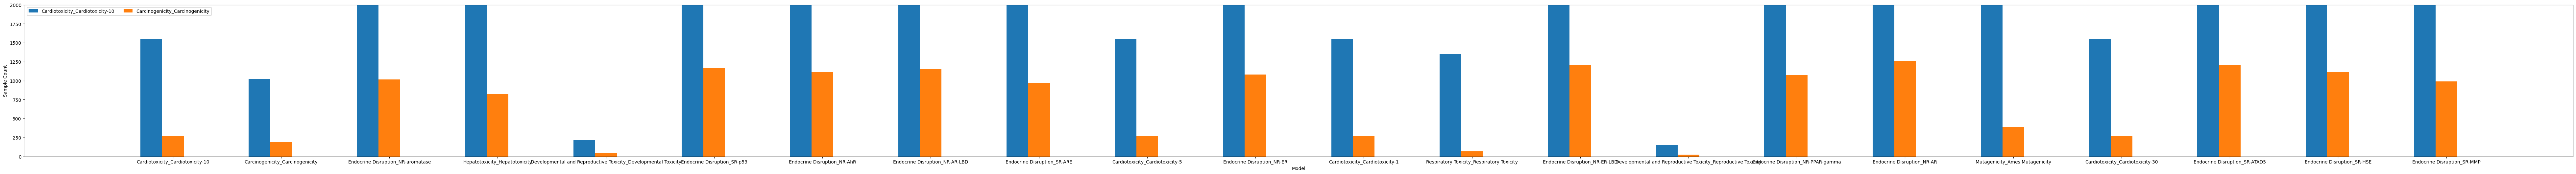

In [83]:
import matplotlib.pyplot as plt
data = cardiovals

x = np.arange(22)  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(100, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=namelist[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Count')
ax.set_xlabel('Model')
ax.set_xticks(x + width, namelist)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 2000)

plt.show()

In [19]:
datasets = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)

finalsets = []
for df in datasets:
    mutids = df['InChIKey'].values
    toxvals = df['Toxicity Value'].values

    todrop = []
    loops = 0
    for item in mutids:
        if item not in overlap:
            todrop.append(loops)
        loops += 1

    temp = df.drop(todrop)
    
    validids = correlations['inchi'].values
    loops = 0
    nrarids = []
    for item in validids:
        if item not in mutids:
            nrarids.append(loops)
        loops+=1
        
    nrar = correlations
    nrar = nrar.reset_index()
    nrar = nrar.drop(nrarids)
    
    nrartoxvals = []
    loops = 0
    for item in nrar['inchi']:
        loops = 0
        seen = []
        for key in mutids:
            if item == key and key not in seen:
                nrartoxvals.append(toxvals[loops])
            seen.append(key)
            loops += 1     
            
    test = nrar
    test.insert(2, 'Toxicity_Value', nrartoxvals)
    df = nrar.drop(['index'], axis = 1)
    df = nrar
    df = df.drop(['index'], axis = 1)
    df = df.reset_index()
    df = df.drop(['index'], axis = 1)
    finalsets.append(df)

In [31]:
finalsets[0]

,inchi,Toxicity_Value,0,1,2,3,4,5,6,7,...,5340,5341,5342,5343,5344,5345,5346,5347,5348,5349
0,JUQLTPCYUFPYKE-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,REYFJDPCWQRWAA-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,JAUOIFJMECXRGI-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,VZYCZNZBPPHOFY-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ZZHLYYDVIOPZBE-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,CPZBLNMUGSZIPR-NVXWUHKLSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,DUDKAZCAISNGQN-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,FTALBRSUTCGOEG-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,XMAYWYJOQHXEEK-ZEQKJWHPSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
path = '/Users/james/Documents/Honours/Data/Targets/Drugbank/datasets/'
extension = '_DBtargets.csv'
loops = 0
for df in finalsets:
    filename = namelist[loops] + extension
    pathname = path + filename
    df.to_csv(pathname)
    loops += 1

In [34]:
pathname

'/Users/james/Documents/Honours/Data/Targets/Drugbank/datasets/Endocrine Disruption_SR-MMPDBtargets.csv'

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc 
from Function_Repo import setbalance
import math
loops = 0
for df in finalsets:
    df = setbalance(df)
    mtry = 5
    train, test = train_test_split(df, test_size=0.2, random_state=81)
    xtrain = train.iloc[:,2:]
    ytrain = train['Toxicity_Value'].values
    xtest = test.iloc[:,2:]
    ytest = test['Toxicity_Value'].values

    rf = RandomForestClassifier( criterion='entropy', max_depth=None, 
                                        min_samples_split=2, min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                        max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                        bootstrap=True, oob_score=False, n_jobs= 4, random_state=81, 
                                        verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    results = metriccalc(preds, ytest)
    print(namelist[loops])
    print('validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1])
    print('net accuracy =', results[6])
    print('mcc =',results[12], '\n')
    
    loops += 1 

Cardiotoxicity_Cardiotoxicity-10
validation metrics of:
positives in data 32
negatives in data 22
net accuracy = 0.6666666666666666
mcc = 0.2931509849889643 

Carcinogenicity_Carcinogenicity
validation metrics of:
positives in data 11
negatives in data 28
net accuracy = 0.8461538461538461
mcc = 0.6033815244679472 

Endocrine Disruption_NR-aromatase
validation metrics of:
positives in data 19
negatives in data 14
net accuracy = 0.5454545454545454
mcc = 0.245681158031834 

Hepatotoxicity_Hepatotoxicity
validation metrics of:
positives in data 94
negatives in data 70
net accuracy = 0.6829268292682927
mcc = 0.3457959629959785 

Developmental and Reproductive Toxicity_Developmental Toxicity
validation metrics of:
positives in data 0
negatives in data 0
net accuracy = 0
mcc = 0 

Endocrine Disruption_SR-p53
validation metrics of:
positives in data 21
negatives in data 21
net accuracy = 0.7380952380952381
mcc = 0.5270462766947299 

Endocrine Disruption_NR-AhR
validation metrics of:
positives 